In [14]:
# Standard dist imports
import os
import sys
sys.path.insert(0, os.path.abspath(os.path.pardir))

# Third party imports
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

# Project level imports
from utils.constants import *

# Module level constants
DEBUG = False
PHASE = TRAIN
SET_ID = 'set00'

In [45]:
# Read in dataset
src_dir = os.path.abspath(os.pardir)
filename = os.path.join(src_dir, 'data/data_{}.csv'.format(PHASE))
df = pd.read_csv(filename)
df = df[df[Columns.VALID] == True]

# Filter for desired set_id
df = df[df[Columns.SET] == SET_ID]
df = df[df[Columns.N_LABELS] != 0].reset_index(drop=True)

In [46]:
df.head()

,images,valid,set,video,frame,coordinates,label,n_labels,phase
0,/datasets/ee285f-public/caltech_pedestrians_us...,True,set00,V000,804,"[[455.63373111328883, 175.03966972723913, 17.6...","[u'people', u'people']",2,train
1,/datasets/ee285f-public/caltech_pedestrians_us...,True,set00,V000,476,"[[495.56238859180024, 144.0337690631809, 27.05...","[u'people', u'person']",2,train
2,/datasets/ee285f-public/caltech_pedestrians_us...,True,set00,V002,166,"[[587.0190540836822, 145.23950589986555, 27.73...","[u'person', u'person']",2,train
3,/datasets/ee285f-public/caltech_pedestrians_us...,True,set00,V012,1149,"[[115.0669481302777, 158.28045838359475, 71.02...",[u'people'],1,train
4,/datasets/ee285f-public/caltech_pedestrians_us...,True,set00,V006,734,"[[20.62909280196546, 146.47040226162076, 67.26...","[u'people', u'people', u'person']",3,train


In [49]:
df.label.value_counts()

[u'person']                                                                                                                  1717
[u'people']                                                                                                                  1696
[u'person', u'person', u'person']                                                                                            1138
[u'person', u'person', u'person', u'person']                                                                                 1048
[u'person', u'person']                                                                                                        943
[u'people', u'person']                                                                                                        834
[u'people', u'person', u'person']                                                                                             757
[u'people', u'person', u'person', u'person', u'person']                                   

Video: V002
Label type: [u'person']
Number of labels: 1


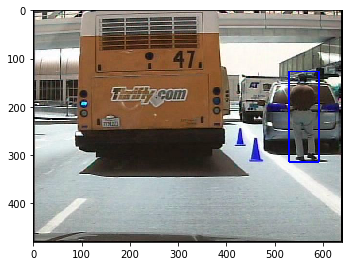

Video: V013
Label type: [u'person']
Number of labels: 1


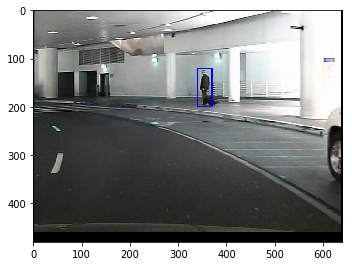

Video: V004
Label type: [u'person']
Number of labels: 1


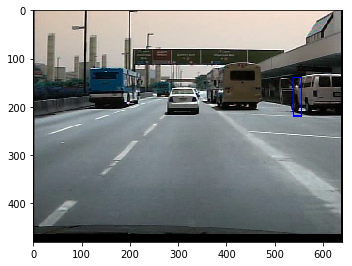

In [64]:
def plot_image(image_name, coordinate):
    n_rows, n_cols = 1, 1
    plt_width, plt_height = 5, 5
    f, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*plt_width, n_rows*plt_height))

    # Grab coordinates and images
    img = cv2.imread(image_name)
    data = eval(coordinate)

    for datum in data:
        # Draw bounding boxes
        x, y, w, h = [int(v) for v in datum]
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    
    ax.imshow(img)
    plt.tight_layout()
    plt.show()

person = df[df[Columns.LABEL] == "[u'person']"].reset_index(drop=True)
for i in range(3):
    idx = np.random.choice(person.shape[0])
    image_name = person.iloc[idx][Columns.IMAGES]
    coordinate = person.iloc[idx][Columns.COORD]
    print('Video: {}'.format(person.iloc[idx][Columns.VIDEO]))
    print('Label type: {}'.format(person.iloc[idx][Columns.LABEL]))
    print("Number of labels: {}".format(person.iloc[idx][Columns.N_LABELS]))
    plot_image(image_name, coordinate)

Video: V012
Label type: [u'people']
Number of labels: 1


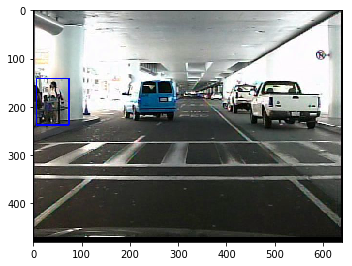

Video: V003
Label type: [u'people']
Number of labels: 1


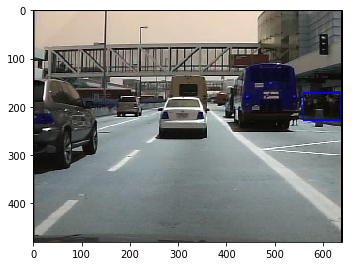

Video: V012
Label type: [u'people']
Number of labels: 1


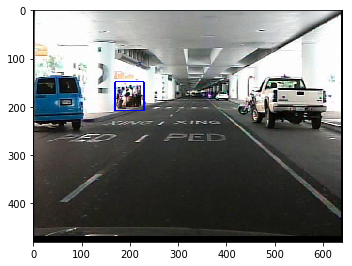

In [62]:
person = df[df[Columns.LABEL] == "[u'people']"].reset_index(drop=True)
for i in range(3):
    idx = np.random.choice(person.shape[0])
    image_name = person.iloc[idx][Columns.IMAGES]
    coordinate = person.iloc[idx][Columns.COORD]
    print('Video: {}'.format(person.iloc[idx][Columns.VIDEO]))
    print('Label type: {}'.format(person.iloc[idx][Columns.LABEL]))
    print("Number of labels: {}".format(person.iloc[idx][Columns.N_LABELS]))
    plot_image(image_name, coordinate)

Video: V002
Label type: [u'person?']
Number of labels: 1


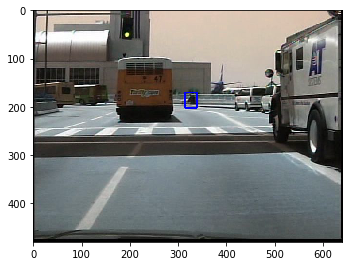

Video: V002
Label type: [u'person?']
Number of labels: 1


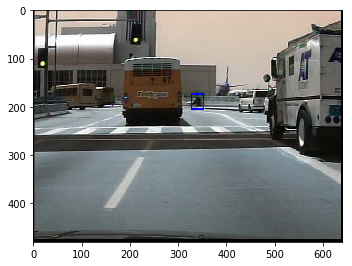

Video: V002
Label type: [u'person?']
Number of labels: 1


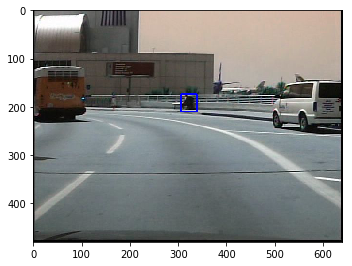

In [63]:
person = df[df[Columns.LABEL] == "[u'person?']"].reset_index(drop=True)
for i in range(3):
    idx = np.random.choice(person.shape[0])
    image_name = person.iloc[idx][Columns.IMAGES]
    coordinate = person.iloc[idx][Columns.COORD]
    print('Video: {}'.format(person.iloc[idx][Columns.VIDEO]))
    print('Label type: {}'.format(person.iloc[idx][Columns.LABEL]))
    print("Number of labels: {}".format(person.iloc[idx][Columns.N_LABELS]))
    plot_image(image_name, coordinate)